In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [6]:
df = pd.read_csv("EDA/data/with_avg_vals.csv")
df.head()

,1_1,1_2,1_3,1_4,1_5,1_6,2_1,2_2,2_3,2_4,...,62_5,62_6,63_1,63_2,63_3,63_4,63_5,63_6,name,task
0,2.148821e-12,1.762882e-12,1.459278e-13,1.587917e-13,8.052632e-14,9.811591e-14,4.880873e-12,3.717614e-12,5.085536e-14,1.059260e-13,...,1.276443e-12,8.376371e-13,2.611143e-12,4.619382e-12,9.115283e-13,4.653725e-13,6.211839e-13,8.285990e-13,chcon_s_100,0
1,1.270260e-12,8.164477e-13,5.903729e-13,3.056763e-13,1.406329e-13,1.300234e-13,1.355080e-12,1.772045e-12,3.034272e-13,5.719425e-13,...,8.724144e-13,1.631172e-12,3.973207e-12,3.763169e-12,1.845015e-12,1.511330e-12,1.079865e-12,2.844522e-12,chcon_s_100,0
2,7.709517e-13,1.717117e-13,3.039963e-13,1.663584e-13,1.726942e-13,1.575523e-14,8.081481e-13,3.148841e-13,2.274227e-13,2.398548e-13,...,4.848598e-13,2.998910e-12,7.980503e-13,1.972731e-12,1.151927e-12,1.502789e-12,1.407080e-12,4.519942e-12,chcon_s_100,0
3,2.800220e-12,3.611335e-13,9.828645e-13,3.723583e-13,1.130286e-13,1.024523e-13,6.833368e-12,1.860960e-13,9.452324e-13,1.900433e-13,...,1.179424e-12,1.033002e-12,2.197372e-12,7.087539e-13,8.981474e-13,9.161498e-13,6.247119e-13,1.532856e-12,chcon_s_100,0
4,9.507999e-13,4.833313e-13,1.694255e-12,1.434799e-13,1.543624e-13,1.756470e-14,2.416072e-12,9.628125e-13,2.960569e-12,1.021592e-13,...,4.516402e-13,2.892556e-13,4.063033e-12,1.206668e-12,1.582814e-12,6.090663e-13,1.444978e-12,2.585149e-12,chcon_s_100,0


In [31]:
trained_models_score_list = []

# get data for person

uniq_vals = np.unique(df.name.values)

for val in uniq_vals:
    X = df.loc[df.name == val].drop(['name', 'task'], axis=1)
    y = df.task.loc[df.name == val]
    
# train model (one for each of the 101 people)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, shuffle=True)
    scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    model = LogisticRegression(random_state=47, max_iter=150)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score
    score = accuracy_score(y_pred, y_test)
    trained_models_score_list.append(float(f"{score:.3f}"))

In [ ]:
df1 = df.loc[df.name == uniq_vals[4]]
sns.pairplot(df1.iloc[:, 0:6])

In [45]:
trained_models_score_list, np.mean(trained_models_score_list)

([0.25,
  0.19,
  0.207,
  0.167,
  0.364,
  0.231,
  0.25,
  0.258,
  0.273,
  0.172,
  0.167,
  0.32,
  0.179,
  0.379,
  0.222,
  0.242,
  0.212,
  0.375,
  0.419,
  0.273,
  0.233,
  0.121,
  0.273,
  0.29,
  0.344,
  0.133,
  0.333,
  0.188,
  0.312,
  0.267,
  0.192,
  0.3,
  0.303,
  0.323,
  0.308,
  0.219,
  0.233,
  0.208,
  0.4,
  0.2,
  0.167,
  0.32,
  0.312,
  0.303,
  0.323,
  0.267,
  0.25,
  0.467,
  0.273,
  0.303,
  0.212,
  0.303,
  0.258,
  0.258,
  0.097,
  0.0,
  0.312,
  0.188,
  0.194,
  0.375,
  0.286,
  0.188,
  0.156,
  0.152,
  0.276,
  0.219,
  0.303,
  0.083,
  0.303,
  0.211,
  0.152,
  0.227,
  0.409,
  0.176,
  0.261,
  0.286,
  0.1,
  0.25,
  0.312,
  0.231,
  0.5,
  0.364,
  0.214,
  0.208,
  0.219,
  0.318,
  0.36,
  0.219,
  0.2,
  0.394,
  0.36,
  0.267,
  0.129,
  0.121,
  0.394,
  0.296,
  0.333,
  0.2,
  0.375,
  0.25,
  0.345],
 0.25899999999999995)

In [99]:
trained_models_score_list2 = []
    
# train model on the whole data

X = df.drop(['name', 'task'], axis=1)
y = df.task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=47, shuffle=True)
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model = LogisticRegression(random_state=47, max_iter=160)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score
score = accuracy_score(y_pred, y_test)
trained_models_score_list2.append(float(f"{score:.3f}"))

In [100]:
trained_models_score_list2

[0.28]

##### Возьмём первые 6 фич (например) и посмотрим возможно ли их разделить какой-нибудь гиперплокостью.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

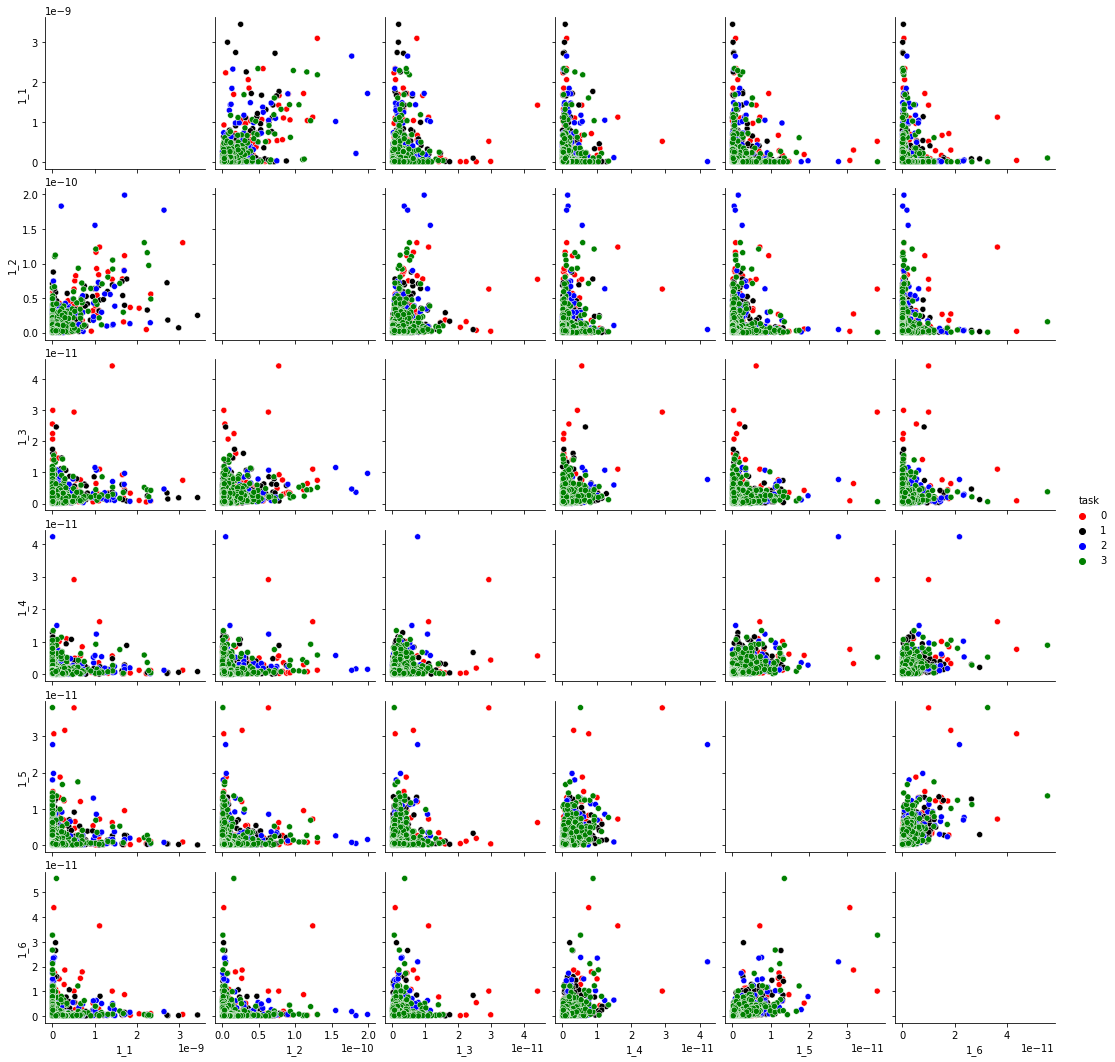

In [76]:
col_names = df.columns.to_list()[0:6] + ['task']
sns.pairplot(df[col_names], hue="task", palette=['r', 'k', 'b', 'g'])

##### Видим, что на нескольких выбранных признаках провести какую-либо плоскость, разделяющую все точки, не получится.
Тогда и все признаки вместе уж точно не будут разделимы. Получается, нужно использовать нелинейные модели. 